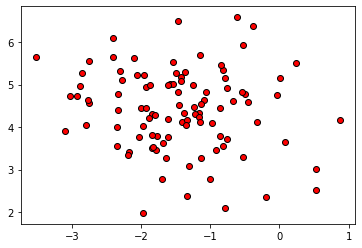

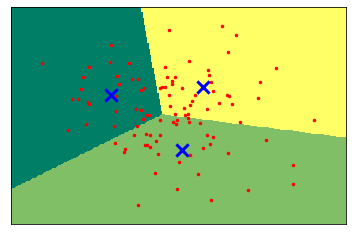

[1 1 0 2 2 2 1 1 0 2 1 2 1 0 1 2 2 1 0 0 2 0 1 1 1 1 2 1 1 1 0 0 1 1 2 0 2
 0 1 0 2 1 0 0 2 2 2 1 0 1 0 1 2 0 2 2 0 2 2 1 2 0 2 1 0 2 0 0 1 2 2 1 2 2
 2 1 2 1 1 0 2 0 2 2 0 1 2 1 0 0 2 1 0 0 2 2 1 2 2 1]


In [7]:
# K-means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

blobs = make_blobs(random_state=1, centers=1)
X_blobs = blobs[0]
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='r', edgecolor='k')
plt.show()

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs)

# draw results
x_min, x_max = X_blobs[:, 0].min() - 0.5, X_blobs[:, 0].max() + 0.5
y_min, y_max = X_blobs[:, 1].min() - 0.5, X_blobs[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()  # clear figure
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.summer,
          aspect='auto', origin='lower')
plt.plot(X_blobs[:, 0], X_blobs[:, 1], 'r.', markersize=5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidth=3, color='b', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

print(kmeans.labels_)

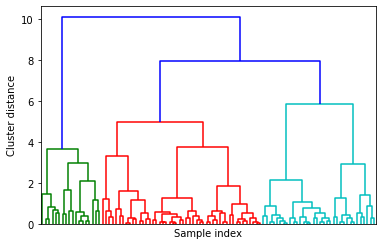

In [11]:
# Hierarchy clustering
from scipy.cluster.hierarchy import dendrogram, ward

linkage = ward(X_blobs)
dendrogram(linkage)
ax = plt.gca()
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.xticks(())
plt.show()

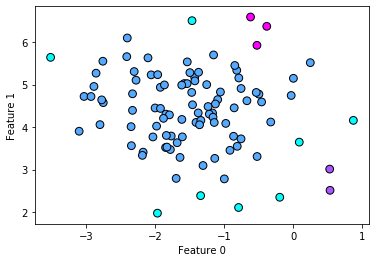

[-1  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  2  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  2
  0  0  0 -1]


In [14]:
# DBSCAN, Density-Based Spatial Clustering of Application with Noise
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=2)
clusters = db.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters, cmap=plt.cm.cool, s=60, edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

print(clusters)        # -1 means noise!